 link of the dataset : https://drive.google.com/drive/folders/1vdr9CC9ChYVW2iXp6PlfyMOGD-4Um1ue

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
import numpy as np

In [2]:
IMAGE_SIZE = [300, 300]

In [3]:
resnet = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob('dataset/*')

In [6]:
flatten = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(flatten)

model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
initial_lr = 0.01


lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_lr,
    decay_steps=25,
    decay_rate=0.96,
    staircase=True
)

In [9]:
optim = tf.keras.optimizers.Adam(learning_rate=lr_scheduler)

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=optim,
  metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
 	zoom_range=0.15,
 	height_shift_range=0.2,
 	shear_range=0.15,
 	horizontal_flip=True,
    validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255) 

In [12]:
train_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='training')


validation_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation') 

Found 1773 images belonging to 4 classes.
Found 196 images belonging to 4 classes.


In [13]:
r = model.fit(
  train_generator,
  validation_data=validation_generator,
  batch_size=64,
  epochs=20,)

Epoch 1/20
56/56 [==============================] - 40s 568ms/step - loss: 50.6968 - accuracy: 0.7524 - val_loss: 42.9215 - val_accuracy: 0.8265
Epoch 2/20
56/56 [==============================] - 30s 535ms/step - loss: 19.1938 - accuracy: 0.8973 - val_loss: 17.2615 - val_accuracy: 0.9184
Epoch 3/20
56/56 [==============================] - 30s 535ms/step - loss: 19.0738 - accuracy: 0.9103 - val_loss: 33.3455 - val_accuracy: 0.8622
Epoch 4/20
56/56 [==============================] - 30s 534ms/step - loss: 13.0736 - accuracy: 0.9177 - val_loss: 39.6211 - val_accuracy: 0.8724
Epoch 5/20
56/56 [==============================] - 30s 530ms/step - loss: 13.4053 - accuracy: 0.9357 - val_loss: 24.9972 - val_accuracy: 0.8929
Epoch 6/20
56/56 [==============================] - 30s 534ms/step - loss: 9.5604 - accuracy: 0.9453 - val_loss: 21.2908 - val_accuracy: 0.9031
Epoch 7/20
56/56 [==============================] - 30s 532ms/step - loss: 10.2145 - accuracy: 0.9447 - val_loss: 25.0557 - val_acc

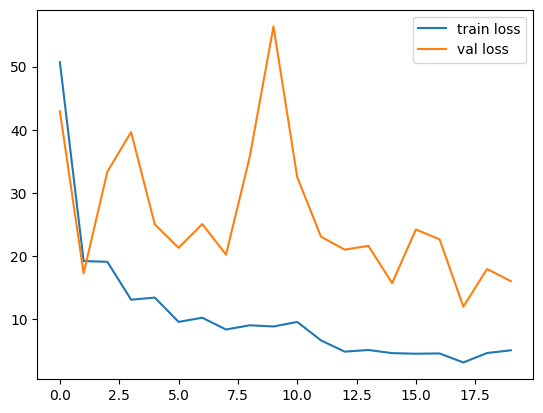

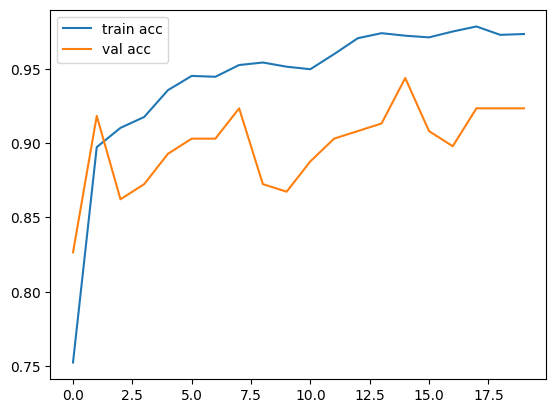

In [25]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [20]:
y_pred = model.predict(validation_generator)

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 3, 1, 1, 3, 3, 1, 1, 1, 2, 3, 2, 3,
       2, 1, 0, 2, 2, 0, 3, 1, 1, 3, 0, 3, 3, 1, 3, 1, 3, 1, 1, 1, 0, 1,
       1, 3, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1,
       0, 2, 3, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 2, 3,
       3, 2, 3, 1, 3, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 2, 2, 1, 2, 3, 2, 3,
       1, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 2, 0, 3, 0, 0,
       3, 3, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 3,
       1, 0, 2, 3, 2, 3, 1, 3, 3, 2, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2, 1, 2],
      dtype=int64)